In [1]:
# Install required libraries
!pip install librosa transformers

In [2]:
# Define paths to data
cha_path = '/kaggle/input/PittCombined/cha'
mp3_path = '/kaggle/input/PittCombined/mp3'

In [3]:
# Import necessary libraries
import os
import librosa
import pandas as pd
from transformers import BertTokenizer, BertModel


In [4]:
# List files in directories
cha_files = [os.path.join(cha_path, file) for file in os.listdir(cha_path) if file.endswith('.cha')]
mp3_files = [os.path.join(mp3_path, file) for file in os.listdir(mp3_path) if file.endswith('.mp3')]

print(f"Found {len(cha_files)} CHA files and {len(mp3_files)} MP3 files.")

Found 1255 CHA files and 1253 MP3 files.


In [5]:
import os
import re
import random
from collections import defaultdict, Counter

def extract_diagnosis(cha_file):
    """Extracts the diagnosis from a CHAT transcript file."""
    with open(cha_file, 'r') as file:
        content = file.read()
    match = re.search(r'@ID:\s*[^|]*\|[^|]*\|[^|]*\|[^|]*\|[^|]*\|([^|]*)\|', content)
    return match.group(1) if match else None

# Paths to your CHA and MP3 files
cha_path = '/kaggle/input/PittCombined/cha'
mp3_path = '/kaggle/input/PittCombined/mp3'

# Load all CHA files and their diagnoses
cha_files = [f for f in os.listdir(cha_path) if f.endswith('.cha')]
diagnoses = [extract_diagnosis(os.path.join(cha_path, f)) for f in cha_files]

# Group files by diagnosis, ensuring corresponding MP3 exists
files_by_diagnosis = defaultdict(list)
for cha_file, diag in zip(cha_files, diagnoses):
    mp3_file = cha_file.replace('.cha', '.mp3')
    if os.path.exists(os.path.join(mp3_path, mp3_file)):
        files_by_diagnosis[diag].append(cha_file)

# Select up to 500 files, trying to balance across diagnoses
selected_files = []
for diag, files in files_by_diagnosis.items():
    select_count = min(len(files), max(500 // len(files_by_diagnosis), 1))
    selected_files.extend(random.sample(files, select_count))

# Ensure the selection does not exceed 10 if categories were unbalanced
selected_files = random.sample(selected_files, min(500, len(selected_files)))

# Count of selected diagnoses
selected_diagnoses = [extract_diagnosis(os.path.join(cha_path, f)) for f in selected_files]
diagnosis_count = Counter(selected_diagnoses)

# Find corresponding MP3 files
selected_mp3_files = [f.replace('.cha', '.mp3') for f in selected_files]

# Collect full paths for the selected files
cha_files = [os.path.join(cha_path, f) for f in selected_files]
mp3_files = [os.path.join(mp3_path, f) for f in selected_mp3_files]

# Output results
print("Selected CHA files:", cha_files)
print("Selected MP3 files:", mp3_files)
print("Diagnosis counts:", dict(diagnosis_count))


Selected CHA files: ['/kaggle/input/PittCombined/cha/022-1.cha', '/kaggle/input/PittCombined/cha/688-0.cha', '/kaggle/input/PittCombined/cha/293-1r.cha', '/kaggle/input/PittCombined/cha/358-0r.cha', '/kaggle/input/PittCombined/cha/530-0.cha', '/kaggle/input/PittCombined/cha/306-0s.cha', '/kaggle/input/PittCombined/cha/016-3f.cha', '/kaggle/input/PittCombined/cha/221-2s.cha', '/kaggle/input/PittCombined/cha/245-2.cha', '/kaggle/input/PittCombined/cha/578-0.cha', '/kaggle/input/PittCombined/cha/175-0.cha', '/kaggle/input/PittCombined/cha/707-0f.cha', '/kaggle/input/PittCombined/cha/024-1.cha', '/kaggle/input/PittCombined/cha/067-1r.cha', '/kaggle/input/PittCombined/cha/030-0f.cha', '/kaggle/input/PittCombined/cha/714-0f.cha', '/kaggle/input/PittCombined/cha/061-0.cha', '/kaggle/input/PittCombined/cha/024-1s.cha', '/kaggle/input/PittCombined/cha/256-2.cha', '/kaggle/input/PittCombined/cha/714-0.cha', '/kaggle/input/PittCombined/cha/223-1r.cha', '/kaggle/input/PittCombined/cha/065-2r.cha',

In [6]:
cha_base_names = set([os.path.splitext(os.path.basename(f))[0] for f in cha_files])
mp3_base_names = set([os.path.splitext(os.path.basename(f))[0] for f in mp3_files])

unmatched_cha = cha_base_names - mp3_base_names
unmatched_mp3 = mp3_base_names - cha_base_names

print("Unmatched CHA files:", unmatched_cha)
print("Unmatched MP3 files:", unmatched_mp3)

Unmatched CHA files: set()
Unmatched MP3 files: set()


In [44]:
import librosa
from transformers import BertTokenizer, BertModel
import soundfile as sf

from transformers import RobertaTokenizer, RobertaModel

# Initialize RoBERTa for biomedical text
tokenizer = RobertaTokenizer.from_pretrained("allenai/biomed_roberta_base")
model = RobertaModel.from_pretrained("allenai/biomed_roberta_base")


tokenizer_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/430 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/656M [00:00<?, ?B/s]

In [45]:
import os
import librosa
import soundfile as sf

def preprocess_audio(mp3_file_path, output_wav_path):
    # Define output path within the writable directory
    output_wav_path = os.path.join('/kaggle/working', os.path.basename(output_wav_path))
    
    try:
        # Check if the WAV file already exists
        if not os.path.exists(output_wav_path):
            # Convert MP3 to WAV
            y, sr = librosa.load(mp3_file_path, sr=None)
            sf.write(output_wav_path, y, sr)
            print(f"Converted {mp3_file_path} to WAV.")
        else:
            print(f"WAV file already exists: {output_wav_path}")

        # Extract MFCC features
        y, sr = librosa.load(output_wav_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        return mfccs.mean(axis=1)
    except Exception as e:
        print(f"An error occurred while processing {mp3_file_path}: {str(e)}")
        return None

# Replace 'mp3_files' with the actual list of mp3 file paths
audio_features = [preprocess_audio(f, f.replace('.mp3', '.wav')) for f in mp3_files if f.endswith('.mp3')]


WAV file already exists: /kaggle/working/022-1.wav
WAV file already exists: /kaggle/working/688-0.wav
WAV file already exists: /kaggle/working/293-1r.wav
WAV file already exists: /kaggle/working/358-0r.wav
WAV file already exists: /kaggle/working/530-0.wav
WAV file already exists: /kaggle/working/306-0s.wav
WAV file already exists: /kaggle/working/016-3f.wav
WAV file already exists: /kaggle/working/221-2s.wav
WAV file already exists: /kaggle/working/245-2.wav
WAV file already exists: /kaggle/working/578-0.wav
WAV file already exists: /kaggle/working/175-0.wav
WAV file already exists: /kaggle/working/707-0f.wav
WAV file already exists: /kaggle/working/024-1.wav
WAV file already exists: /kaggle/working/067-1r.wav
WAV file already exists: /kaggle/working/030-0f.wav
WAV file already exists: /kaggle/working/714-0f.wav
WAV file already exists: /kaggle/working/061-0.wav
WAV file already exists: /kaggle/working/024-1s.wav
WAV file already exists: /kaggle/working/256-2.wav
WAV file already exis

In [46]:
# Define a function to preprocess text data
def preprocess_text(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    # Insert text cleaning code here as necessary
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding="max_length")
    outputs = model(**inputs)
    return outputs.last_hidden_state.squeeze().detach().numpy()

In [47]:
print(cha_files)

['/kaggle/input/PittCombined/cha/022-1.cha', '/kaggle/input/PittCombined/cha/688-0.cha', '/kaggle/input/PittCombined/cha/293-1r.cha', '/kaggle/input/PittCombined/cha/358-0r.cha', '/kaggle/input/PittCombined/cha/530-0.cha', '/kaggle/input/PittCombined/cha/306-0s.cha', '/kaggle/input/PittCombined/cha/016-3f.cha', '/kaggle/input/PittCombined/cha/221-2s.cha', '/kaggle/input/PittCombined/cha/245-2.cha', '/kaggle/input/PittCombined/cha/578-0.cha', '/kaggle/input/PittCombined/cha/175-0.cha', '/kaggle/input/PittCombined/cha/707-0f.cha', '/kaggle/input/PittCombined/cha/024-1.cha', '/kaggle/input/PittCombined/cha/067-1r.cha', '/kaggle/input/PittCombined/cha/030-0f.cha', '/kaggle/input/PittCombined/cha/714-0f.cha', '/kaggle/input/PittCombined/cha/061-0.cha', '/kaggle/input/PittCombined/cha/024-1s.cha', '/kaggle/input/PittCombined/cha/256-2.cha', '/kaggle/input/PittCombined/cha/714-0.cha', '/kaggle/input/PittCombined/cha/223-1r.cha', '/kaggle/input/PittCombined/cha/065-2r.cha', '/kaggle/input/Pitt

In [48]:
# Process each file
text_embeddings = [preprocess_text(f) for f in cha_files]

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming text_embeddings and audio_features are lists of numpy arrays
# Convert lists to numpy arrays
text_features = np.array(text_embeddings)
audio_features = np.stack(audio_features)

In [50]:
print(text_features)

[[[-7.74859414e-02  4.49419674e-03 -1.25761451e-02 ... -3.70593309e-01
   -4.83989425e-04 -6.57943171e-03]
  [-2.38104761e-01 -1.93083361e-01 -4.03106511e-02 ... -1.12500477e+00
    1.67931374e-02 -4.14460786e-02]
  [-3.41521919e-01 -8.22986588e-02 -4.68411855e-02 ... -5.82374148e-02
   -1.94698758e-02  4.49254103e-02]
  ...
  [ 4.82609905e-02 -2.45759875e-01  2.23049372e-01 ... -7.65990317e-01
    1.57198891e-01  1.10893376e-01]
  [ 2.23438200e-02 -3.14829320e-01  3.08731556e-01 ... -3.84126306e-01
    1.20087296e-01 -3.21713656e-01]
  [-7.76692703e-02  4.38403944e-03 -1.26345837e-02 ... -3.70864660e-01
   -6.09384209e-04 -6.50227256e-03]]

 [[-8.02753791e-02  7.81504344e-03 -2.20631305e-02 ... -3.49114448e-01
    1.54579896e-02  1.73818115e-02]
  [-2.13321328e-01 -1.88313052e-01 -2.64909044e-02 ... -1.15560365e+00
    5.00908270e-02 -4.44620140e-02]
  [-3.57865095e-01 -1.13659710e-01 -4.16963324e-02 ... -7.10308924e-02
   -3.69673893e-02  5.67929782e-02]
  ...
  [ 7.60290474e-02 -3.8

In [51]:
print(audio_features)

[[-5.11225433e+02  6.53387833e+01  2.34411430e+01 ... -1.39485323e+00
   4.44982815e+00  1.66837907e+00]
 [-3.19159790e+02  1.69048904e+02  4.77356682e+01 ... -5.47180235e-01
   3.64431351e-01 -6.71743870e-01]
 [-4.98814148e+02  8.83608932e+01  3.59828186e+01 ... -1.10074830e+00
  -1.63820851e+00 -1.52570999e+00]
 ...
 [-3.56962067e+02  1.26466194e+02  2.12791595e+01 ... -1.37554121e+00
  -4.04816985e-01 -2.66910481e+00]
 [-3.87139557e+02  1.41919678e+02  1.06170177e+01 ...  5.05216074e+00
   1.42419219e+00  6.31599054e-02]
 [-5.48376770e+02  9.21600800e+01  9.70790672e+00 ... -8.51008224e+00
   4.99290419e+00 -5.11278391e+00]]


In [52]:
text_features = np.mean(text_features, axis=1)


In [53]:
print(text_features)

[[ 0.00674    -0.05743641  0.04996946 ... -0.4338418   0.04352972
   0.00106464]
 [ 0.00732782 -0.05925907  0.03947734 ... -0.48325175  0.06481291
  -0.00673377]
 [-0.05416054 -0.14934133  0.08153944 ... -0.45665047  0.01250249
   0.07129917]
 ...
 [-0.0113274  -0.05443592  0.02573955 ... -0.48946336  0.02205875
  -0.02241118]
 [-0.0413509  -0.0034899   0.04998248 ... -0.40058035  0.00186124
   0.04573976]
 [-0.01729151 -0.06291458  0.04061333 ... -0.45392826  0.07551127
  -0.01975637]]


In [54]:
# Ensure audio_features is 2D (it should already be if you've extracted features correctly)
if audio_features.ndim > 2:
    audio_features = np.mean(audio_features, axis=1)

In [55]:
# Combine text and audio features
combined_features = np.concatenate([text_features, audio_features], axis=1)

In [56]:
print(combined_features)

[[ 6.7399982e-03 -5.7436410e-02  4.9969465e-02 ... -1.3948532e+00
   4.4498281e+00  1.6683791e+00]
 [ 7.3278220e-03 -5.9259072e-02  3.9477345e-02 ... -5.4718024e-01
   3.6443135e-01 -6.7174387e-01]
 [-5.4160539e-02 -1.4934133e-01  8.1539445e-02 ... -1.1007483e+00
  -1.6382085e+00 -1.5257100e+00]
 ...
 [-1.1327397e-02 -5.4435924e-02  2.5739545e-02 ... -1.3755412e+00
  -4.0481699e-01 -2.6691048e+00]
 [-4.1350897e-02 -3.4898985e-03  4.9982484e-02 ...  5.0521607e+00
   1.4241922e+00  6.3159905e-02]
 [-1.7291507e-02 -6.2914580e-02  4.0613331e-02 ... -8.5100822e+00
   4.9929042e+00 -5.1127839e+00]]


In [57]:
# Normalize the combined features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(combined_features)

In [58]:
import re

def extract_diagnostic_code(cha_file):
    # Read the content of the .cha file
    with open(cha_file, 'r') as file:
        content = file.read()

    # Regex to find the diagnosis in the file content based on the updated structure
    match = re.search(r'@ID:\s*[^|]*\|[^|]*\|[^|]*\|[^|]*\|[^|]*\|([^|]*)\|\|', content)
    if match:
        return match.group(1).strip()
    return None

labels = [extract_diagnostic_code(f) for f in cha_files]

for label in labels[:10]:  # Print first 10 labels to verify
    print(label)


Control
Control
ProbableAD
Probable
PossibleAD
PossibleAD
MCI
MCI
Control
MCI


In [59]:
from sklearn.preprocessing import LabelEncoder

# Encode labels as integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)


In [60]:
print(encoded_labels)

[0 0 7 6 5 5 2 2 0 2 0 5 3 7 2 5 2 3 0 5 8 2 5 5 7 6 7 8 0 4 7 0 0 5 0 7 3
 7 0 0 7 8 0 5 5 2 5 5 5 7 2 2 0 7 2 8 7 2 7 7 0 5 7 2 2 7 5 2 7 7 3 2 7 5
 2 7 2 5 2 2 2 7 8 7 7 5 5 3 5 2 3 7 0 5 5 2 0 2 0 0 7 2 5 0 2 8 2 2 8 7 2
 0 5 0 2 7 8 0 0 0 0 0 3 7 0 2 2 4 2 2 0 6 2 2 7 7 7 5 7 0 8 2 5 3 5 5 5 7
 4 5 5 5 2 2 5 3 2 0 7 5 5 8 0 2 0 0 0 0 0 2 0 0 0 0 5 7 7 0 1 0 8 7 8 3 2
 7 2 4 8 5 5 0 2 7 5 7 7 5 7 5 5 2 2 5 8 8 7 0 2 7 5 2 7 7 8 7 7 5 0 8 7 5
 0 5 5 2 2 2 0 7 7 0 5 8 6 2 5 5 2 7 0 5 2 0 2 3 5 0 0 7 7 0 7 3 8 0 7 5 5
 0]


In [61]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, Conv1D, GlobalAveragePooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [62]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [63]:
# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(normalized_features, encoded_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Finding the maximum label value across all datasets to ensure consistency
max_label = max(np.max(y_train), np.max(y_val), np.max(y_test)) + 1  # Plus one because classes are zero-indexed

# One-hot encode the labels with a consistent number of classes across datasets
y_train = to_categorical(y_train, num_classes=max_label)
y_val = to_categorical(y_val, num_classes=max_label)
y_test = to_categorical(y_test, num_classes=max_label)




In [64]:
print("y_test",y_test)

y_test [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0

In [65]:
from tensorflow.keras.regularizers import l2

# Model architecture
input_text = Input(shape=(768,))  # Text features from Clinical BERT
input_audio = Input(shape=(13,))  # Audio features, assuming MFCCs with 13 coefficients

# Text pathway
text_dense = Dense(128, activation='relu', kernel_regularizer=l2(0.1))(input_text)
text_bn = BatchNormalization()(text_dense)  # Add batch normalization
text_out = Dropout(0.5)(text_bn)  # Increase dropout rate


In [66]:
from tensorflow.keras.layers import Reshape

# Audio pathway
audio_reshape = Reshape((13, 1))(input_audio)
conv1 = Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.1))(audio_reshape)
conv1_bn = BatchNormalization()(conv1)
conv1_pool = GlobalAveragePooling1D()(conv1_bn)
audio_out = Dropout(0.5)(conv1_pool)  # Increase dropout rate

In [67]:
# Fusion and output
concatenated = Concatenate()([text_out, audio_out])
dense_layer = Dense(64, activation='relu', kernel_regularizer=l2(0.1))(concatenated)  # Regularize dense layer

# Assuming y_train has already been one-hot encoded correctly
num_classes = y_train.shape[1]

# Adjust your output layer
output_layer = Dense(num_classes, activation='softmax')(dense_layer)


In [68]:
print(concatenated)

<KerasTensor shape=(None, 192), dtype=float32, sparse=False, name=keras_tensor_23>


In [69]:
from tensorflow.keras.metrics import Precision, Recall

# Compile model
model = Model(inputs=[input_text, input_audio], outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', 
              metrics=['accuracy', Precision(), Recall()])


In [70]:
# Fit model on training data
history = model.fit([X_train[:, :768], X_train[:, 768:]], y_train, validation_data=([X_val[:, :768], X_val[:, 768:]], y_val), epochs=100, batch_size=32)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.1187 - loss: 33.9102 - precision_1: 0.0536 - recall_1: 0.0052 - val_accuracy: 0.2500 - val_loss: 31.3034 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3036 - loss: 30.7213 - precision_1: 0.5051 - recall_1: 0.0445 - val_accuracy: 0.3462 - val_loss: 28.7639 - val_precision_1: 0.5000 - val_recall_1: 0.0577
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4275 - loss: 27.9976 - precision_1: 0.6026 - recall_1: 0.1411 - val_accuracy: 0.3462 - val_loss: 26.2994 - val_precision_1: 0.6364 - val_recall_1: 0.1346
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5044 - loss: 25.4557 - precision_1: 0.6570 - recall_1: 0.1494 - val_accuracy: 0.3077 - val_loss: 23.9699 - val_precision_1: 0.5833 - val_recall_1: 0.1346
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5371 - loss: 23.0253 - precision_1: 0.6531 - recall_1: 

In [71]:
# Evaluate the model on the test set
evaluation = model.evaluate([X_test[:, :768], X_test[:, 768:]], y_test)
print(f'Accuracy: {evaluation[1]*100:.2f}%, Precision: {evaluation[2]*100:.2f}%, Recall: {evaluation[3]*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3918 - loss: 2.4531 - precision_1: 0.4481 - recall_1: 0.3558
Accuracy: 38.46%, Precision: 45.00%, Recall: 34.62%


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# First, predict the classes using the model
predictions = model.predict([X_test[:, :768], X_test[:, 768:]])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate the accuracy, precision, and recall for each class using scikit-learn's functionality
# This handles all classes at once without needing to manually index each class
accuracy = accuracy_score(true_classes, predicted_classes) * 100
precision = precision_score(true_classes, predicted_classes, average=None, zero_division=0) * 100
recall = recall_score(true_classes, predicted_classes, average=None, zero_division=0) * 100

# Retrieve the class names from the label encoder
class_names = label_encoder.inverse_transform(np.unique(true_classes))

# Display per-class metrics
class_metrics = {}
for idx, class_name in enumerate(class_names):
    class_metrics[class_name] = {
        'Accuracy': accuracy,
        'Precision': precision[idx],
        'Recall': recall[idx]
    }

# Print per-class accuracy, precision, and recall
print("Per-class Metrics:")
for class_name, metrics in class_metrics.items():
    print(f"{class_name}: Accuracy={metrics['Accuracy']:.2f}%, Precision={metrics['Precision']:.2f}%, Recall={metrics['Recall']:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Per-class Metrics:
Control: Accuracy=38.46%, Precision=53.85%, Recall=58.33%
MCI: Accuracy=38.46%, Precision=35.71%, Recall=50.00%
Memory: Accuracy=38.46%, Precision=0.00%, Recall=0.00%
PossibleAD: Accuracy=38.46%, Precision=45.45%, Recall=35.71%
Probable: Accuracy=38.46%, Precision=0.00%, Recall=0.00%
ProbableAD: Accuracy=38.46%, Precision=21.43%, Recall=25.00%
Vascular: Accuracy=38.46%, Precision=0.00%, Recall=0.00%


In [73]:
history.history

{'accuracy': [0.12820513546466827,
  0.29487180709838867,
  0.4294871687889099,
  0.4871794879436493,
  0.5384615659713745,
  0.6089743375778198,
  0.5961538553237915,
  0.6538461446762085,
  0.7051281929016113,
  0.692307710647583,
  0.7820512652397156,
  0.8012820482254028,
  0.8397436141967773,
  0.8205128312110901,
  0.9038461446762085,
  0.8910256624221802,
  0.8910256624221802,
  0.9230769276618958,
  0.8974359035491943,
  0.9294871687889099,
  0.942307710647583,
  0.9551281929016113,
  0.9358974099159241,
  0.942307710647583,
  0.9487179517745972,
  0.9551281929016113,
  0.9551281929016113,
  0.9551281929016113,
  0.9615384340286255,
  0.9487179517745972,
  0.9551281929016113,
  0.9615384340286255,
  0.9743589758872986,
  0.9615384340286255,
  0.9615384340286255,
  0.9358974099159241,
  0.9358974099159241,
  0.9487179517745972,
  0.9294871687889099,
  0.9551281929016113,
  0.9230769276618958,
  0.9487179517745972,
  0.9358974099159241,
  0.9551281929016113,
  0.9679487347602844,

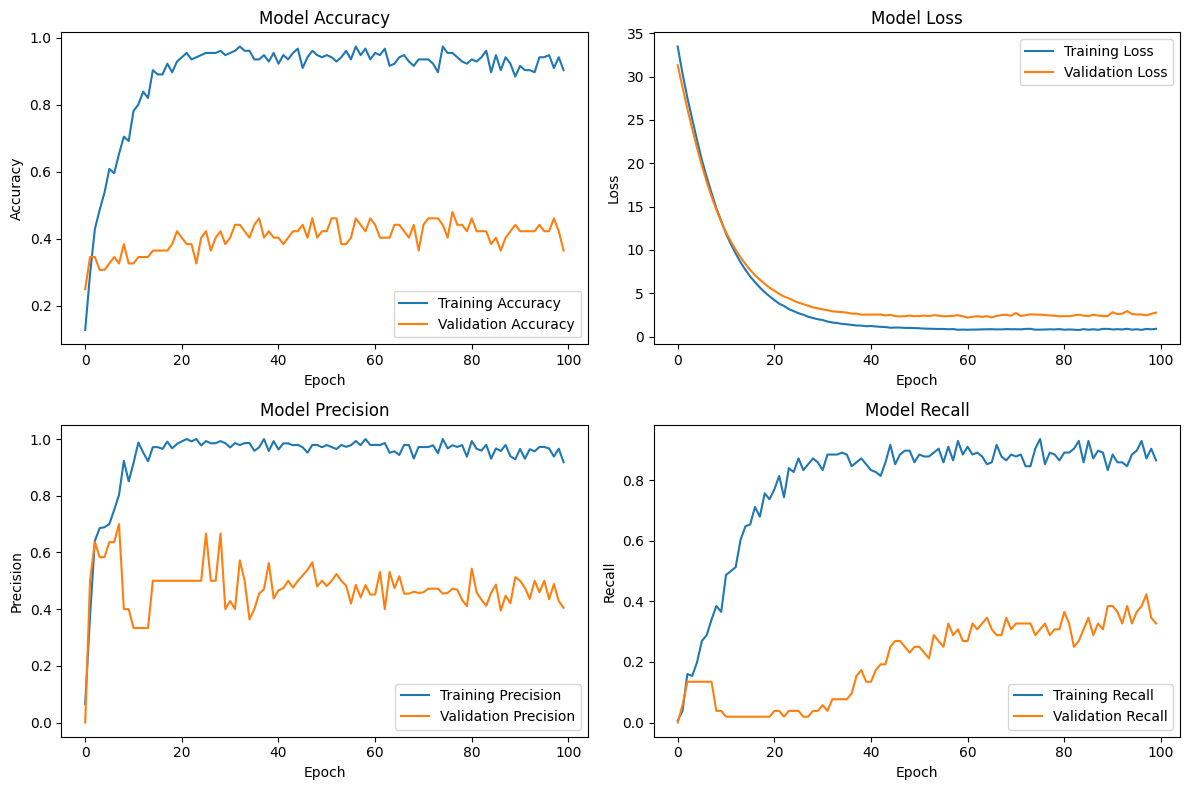

In [75]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plotting accuracy
    plt.figure(figsize=(12, 8))

    # Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Precision
    plt.subplot(2, 2, 3)
    plt.plot(history.history['precision_1'], label='Training Precision')
    plt.plot(history.history['val_precision_1'], label='Validation Precision')
    plt.title('Model Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()

    # Recall
    plt.subplot(2, 2, 4)
    plt.plot(history.history['recall_1'], label='Training Recall')
    plt.plot(history.history['val_recall_1'], label='Validation Recall')
    plt.title('Model Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


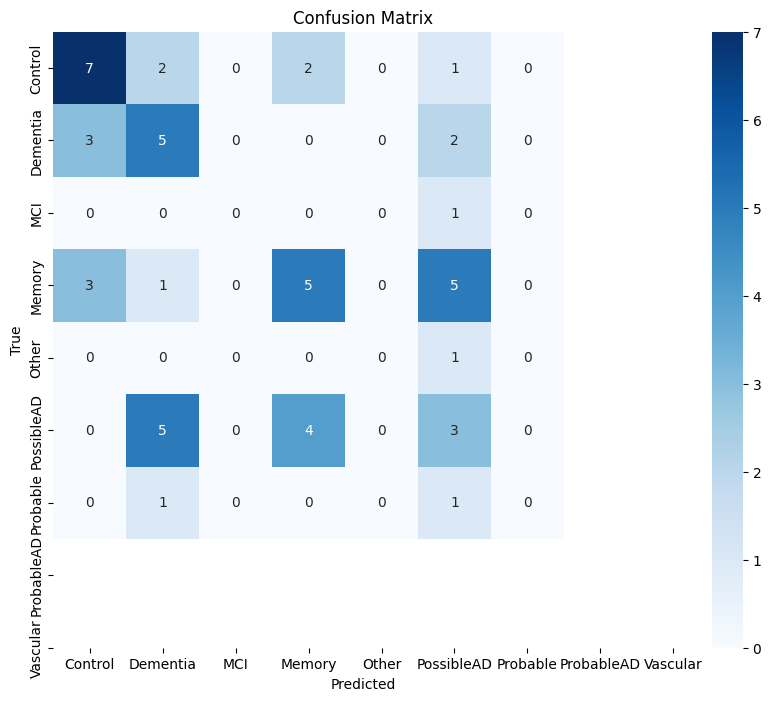

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'y_test' are the true labels and 'predicted_classes' are the predicted labels
predictions = model.predict([X_test[:, :768], X_test[:, 768:]])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

def plot_confusion_matrix(true_classes, predicted_classes, class_names):
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage:
class_names = label_encoder.classes_  # Assuming you used a label encoder for your classes
plot_confusion_matrix(true_classes, predicted_classes, class_names)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


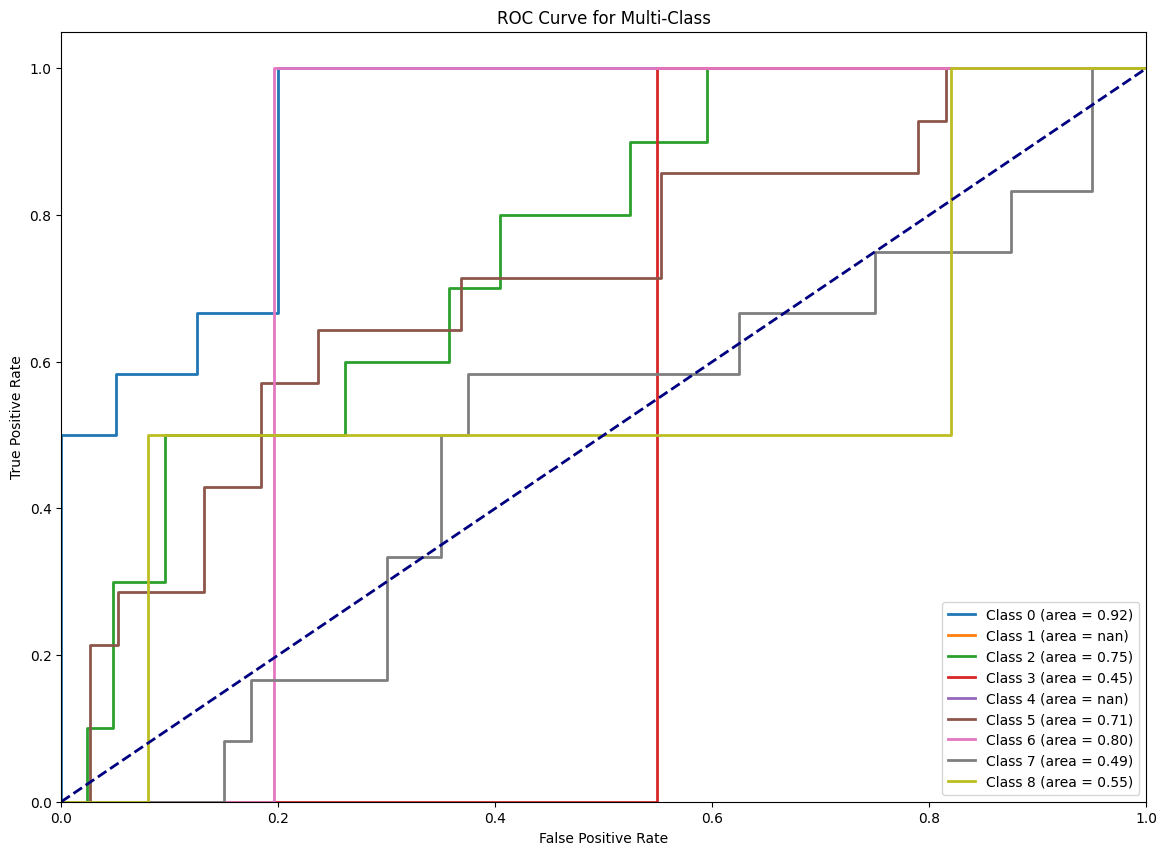

In [77]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=np.arange(len(class_names)))

def plot_roc_curves(y_test_binarized, predictions, num_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    plt.figure(figsize=(14, 10))
    
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-Class')
    plt.legend(loc="lower right")
    plt.show()

# Example usage:
plot_roc_curves(y_test_binarized, predictions, len(class_names))


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


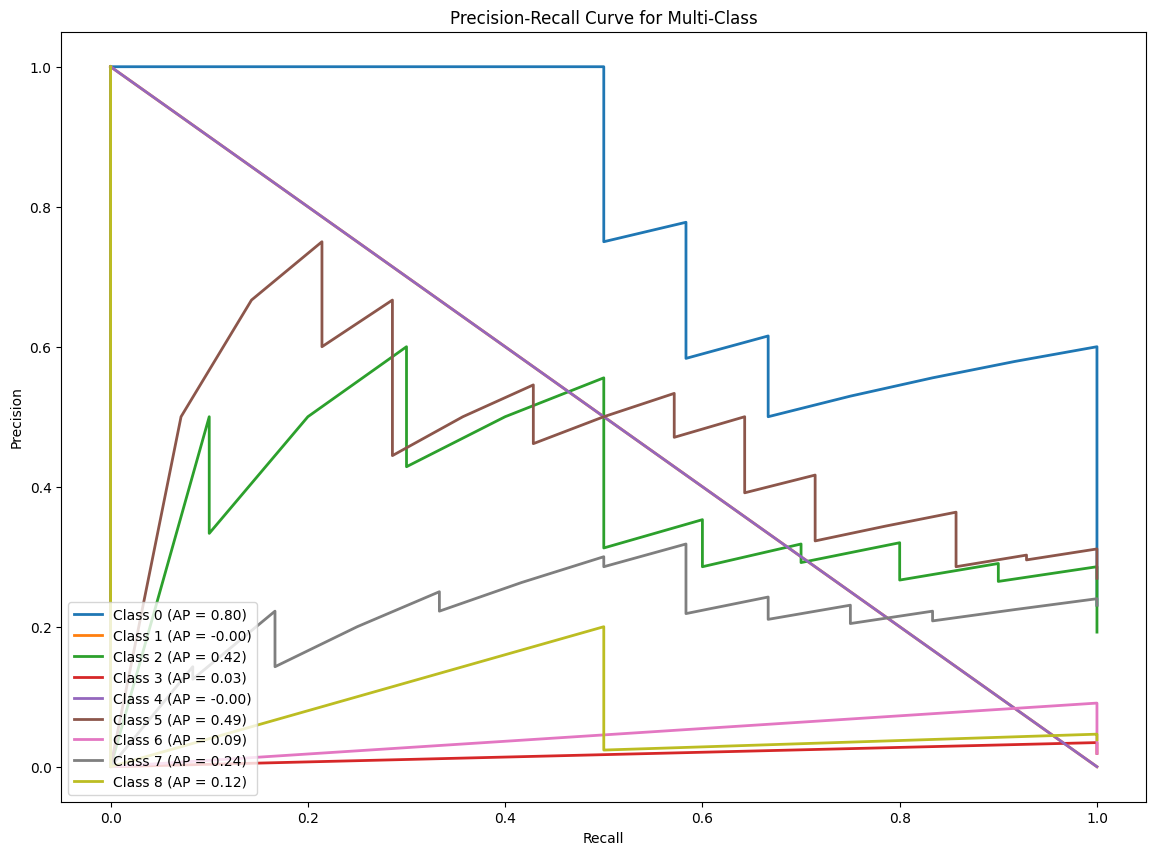

In [78]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def plot_precision_recall_curves(y_test_binarized, predictions, num_classes):
    plt.figure(figsize=(14, 10))
    
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], predictions[:, i])
        average_precision = average_precision_score(y_test_binarized[:, i], predictions[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i} (AP = {average_precision:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Multi-Class')
    plt.legend(loc="lower left")
    plt.show()

# Example usage:
plot_precision_recall_curves(y_test_binarized, predictions, len(class_names))


In [79]:
# Required Libraries
import scipy.stats as stats

# Assuming 'selected_diagnoses' is a list of diagnoses corresponding to 'selected_files'
diagnosis_counts = Counter(selected_diagnoses)
print("Diagnosis Counts:", diagnosis_counts)

# Expected counts assuming uniform distribution across diagnoses
expected_counts = [len(selected_files) / len(diagnosis_counts) for _ in range(len(diagnosis_counts))]

# Conducting the Chi-Square Test
chi_square_stat, p_value = stats.chisquare(list(diagnosis_counts.values()), f_exp=expected_counts)

print("Chi-Square Statistic:", chi_square_stat)
print("P-Value:", p_value)


Diagnosis Counts: Counter({'Control': 55, 'ProbableAD': 55, 'PossibleAD': 55, 'MCI': 55, 'Vascular': 19, 'Memory': 12, 'Probable': 4, 'Other': 4, 'Dementia': 1})
Chi-Square Statistic: 177.4692307692308
P-Value: 3.498951523069437e-34
